In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

In [3]:
#import pathlib
#dataset_url = 'https://www.kaggle.com/dhruvildave/english-handwritten-characters-dataset/download'
#data_dir = tf.keras.utils.get_file('Chars', origin=dataset_url, untar=True)
#data_dir = pathlib.Path(data_dir)
#print(data_dir)

In [4]:
dir = r'C:\Users\Afonso\anaconda3\envs\hello-tf\Img'
data_dir = tf.keras.utils.get_file('Chars', origin=dir, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir = dir

In [5]:
##Create Dataset

batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
        

Found 3410 files belonging to 62 classes.
Using 2728 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3410 files belonging to 62 classes.
Using 682 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['BigA', 'BigB', 'BigC', 'BigD', 'BigE', 'BigF', 'BigG', 'BigH', 'BigI', 'BigJ', 'BigK', 'BigL', 'BigM', 'BigN', 'BigO', 'BigP', 'BigQ', 'BigR', 'BigS', 'BigT', 'BigU', 'BigV', 'BigW', 'BigX', 'BigY', 'BigZ', 'Eight', 'Five', 'Four', 'Nine', 'One', 'Seven', 'Six', 'SmallA', 'SmallB', 'SmallC', 'SmallD', 'SmallE', 'SmallF', 'SmallG', 'SmallH', 'SmallI', 'SmallJ', 'SmallK', 'SmallL', 'SmallM', 'SmallN', 'SmallO', 'SmallP', 'SmallQ', 'SmallR', 'SmallS', 'SmallT', 'SmallU', 'SmallV', 'SmallW', 'SmallX', 'SmallY', 'SmallZ', 'Three', 'Two', 'Zero']


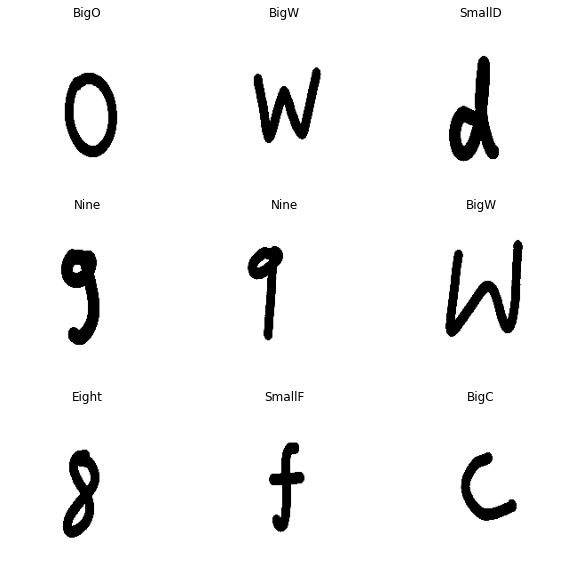

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [14]:
num_classes = 62

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
86/86 [==============================] - 62s 713ms/step - loss: 4.1335 - accuracy: 0.0169 - val_loss: 4.1143 - val_accuracy: 0.0411
Epoch 2/10
86/86 [==============================] - 57s 660ms/step - loss: 4.0646 - accuracy: 0.0466 - val_loss: 4.0074 - val_accuracy: 0.0455
Epoch 3/10
86/86 [==============================] - 60s 694ms/step - loss: 3.7899 - accuracy: 0.0920 - val_loss: 3.6728 - val_accuracy: 0.0938
Epoch 4/10
86/86 [==============================] - 56s 646ms/step - loss: 3.3093 - accuracy: 0.1866 - val_loss: 3.3537 - val_accuracy: 0.1686
Epoch 5/10
86/86 [==============================] - 59s 682ms/step - loss: 2.8505 - accuracy: 0.2878 - val_loss: 3.1862 - val_accuracy: 0.2038
Epoch 6/10
86/86 [==============================] - 56s 656ms/step - loss: 2.4583 - accuracy: 0.3820 - val_loss: 2.9682 - val_accuracy: 0.2713
Epoch 7/10
86/86 [==============================] - 56s 653ms/step - loss: 2.1280 - accuracy: 0.4611 - val_loss: 2.8810 - val_accuracy: 0.2889

In [18]:
model.save(r'C:\Users\Afonso\anaconda3\envs\hello-tf\ResNet50')

INFO:tensorflow:Assets written to: C:\Users\Afonso\anaconda3\envs\hello-tf\ResNet50\assets


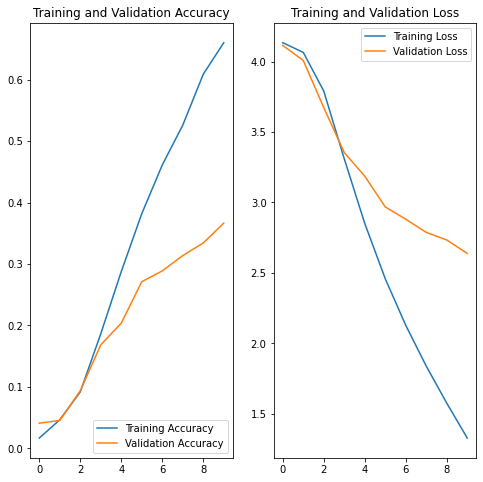

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
#Means of accuracy
sum_acc = 0
for i in range(len(acc)):
    sum_acc = sum_acc + acc[i]
    acc_mean = sum_acc / len(acc)

sum_val_acc = 0
for i in range(len(val_acc)):
    sum_val_acc = sum_val_acc + val_acc[i]
    val_acc_mean = sum_val_acc / len(val_acc)

print('Mean Validation Accuracy: ' + str(val_acc_mean))
print('Mean Training Accuracy:' + str(acc_mean))

#Means of Loss
sum_loss = 0
for i in range(len(loss)):
    sum_loss = sum_loss + loss[i]
    loss_mean = sum_loss / len(loss)

sum_val_loss = 0
for i in range(len(val_loss)):
    sum_val_loss = sum_val_loss + val_loss[i]
    val_loss_mean = sum_val_loss / len(val_loss)

print('Mean Validation Loss: ' + str(val_loss_mean))
print('Mean Training Loss:' + str(loss_mean))

Mean Validation Accuracy: 0.21275660060346127
Mean Training Accuracy:0.32679618913680314
Mean Validation Loss: 3.234302043914795
Mean Training Loss:2.74768203496933


In [21]:
score = model.evaluate(train_ds)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

86/86 [==============================] - 18s 205ms/step - loss: 1.1340 - accuracy: 0.7262
Test loss: 1.1339683532714844
Test accuracy: 0.7261730432510376


In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

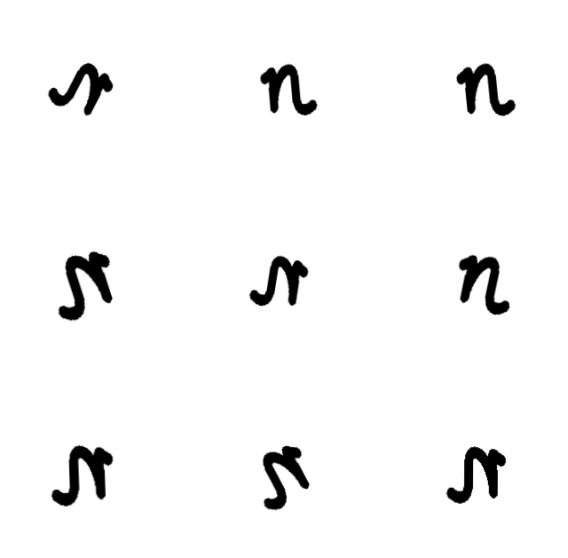

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [24]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [27]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
86/86 [==============================] - 72s 818ms/step - loss: 4.1994 - accuracy: 0.0216 - val_loss: 4.0796 - val_accuracy: 0.0161
Epoch 2/15
86/86 [==============================] - 81s 938ms/step - loss: 3.8375 - accuracy: 0.0678 - val_loss: 3.4872 - val_accuracy: 0.1408
Epoch 3/15
86/86 [==============================] - 78s 901ms/step - loss: 3.1827 - accuracy: 0.1844 - val_loss: 2.9175 - val_accuracy: 0.2214
Epoch 4/15
86/86 [==============================] - 70s 813ms/step - loss: 2.7337 - accuracy: 0.2900 - val_loss: 2.5719 - val_accuracy: 0.3402
Epoch 5/15
86/86 [==============================] - 69s 799ms/step - loss: 2.4028 - accuracy: 0.3523 - val_loss: 2.3431 - val_accuracy: 0.3959
Epoch 6/15
86/86 [==============================] - 69s 799ms/step - loss: 2.1842 - accuracy: 0.4120 - val_loss: 2.2507 - val_accuracy: 0.4120
Epoch 7/15
86/86 [==============================] - 74s 867ms/step - loss: 2.0043 - accuracy: 0.4366 - val_loss: 2.1211 - val_accuracy: 0.4282

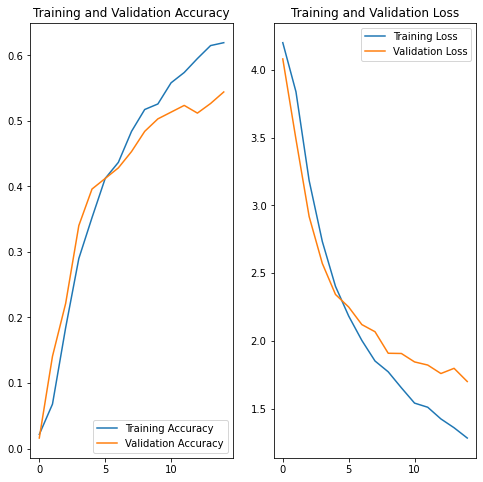

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
#Means of accuracy
sum_acc = 0
for i in range(len(acc)):
    sum_acc = sum_acc + acc[i]
    acc_mean = sum_acc / len(acc)

sum_val_acc = 0
for i in range(len(val_acc)):
    sum_val_acc = sum_val_acc + val_acc[i]
    val_acc_mean = sum_val_acc / len(val_acc)

print('Mean Validation Accuracy: ' + str(val_acc_mean))
print('Mean Training Accuracy:' + str(acc_mean))

#Means of Loss
sum_loss = 0
for i in range(len(loss)):
    sum_loss = sum_loss + loss[i]
    loss_mean = sum_loss / len(loss)

sum_val_loss = 0
for i in range(len(val_loss)):
    sum_val_loss = sum_val_loss + val_loss[i]
    val_loss_mean = sum_val_loss / len(val_loss)

print('Mean Validation Loss: ' + str(val_loss_mean))
print('Mean Training Loss:' + str(loss_mean))

Mean Validation Accuracy: 0.40087976058324176
Mean Training Accuracy:0.41678885407745836
Mean Validation Loss: 2.3057263612747194
Mean Training Loss:2.1966434796651204


In [31]:
score = model.evaluate(train_ds)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

86/86 [==============================] - 17s 195ms/step - loss: 0.9450 - accuracy: 0.7199
Test loss: 0.9449942708015442
Test accuracy: 0.7199413776397705


In [ ]:
dir = r'C:\Users\Afonso\anaconda3\envs\hello-tf\Solo'
data_dir = tf.keras.utils.get_file('Chars', origin=dir, untar=True)
print(data_dir)
data_dir = pathlib.Path(data_dir)
print(data_dir)
data_dir = dir
print(data_dir)

img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)